In [1]:
#Import Libraries
import pandas as pd #CSV handler library
import numpy as np #Advanced arrays
import matplotlib.pyplot as plt # Graph library
from sklearn.linear_model import LinearRegression
#%matplotlib inline

# Linear Regression

- Linear Regression, a simple approach to supervised learning
- Linear regression is a useful tool for predicting a quantitative response
- It may seem dull compared to more modern statistical learning approaches, it is still useful and widely used statistical learning method
- Many other statistical learning method can be seen as generalization or extensions of linear regression
- We will review key ideas of linear regression model as well as least squares approach used to fit this model


- We will need a dataset so for this case, we will use **Advertising** data to display **sales**
- As a statistical consultants, we are asked to suggest a marketing plan for next year that will result in a high product sales
- What information would be useful?
    - Is there a relationship between advertising budget and sales?
        - Determine wheather the data provide evidence of an association between advertising and sales. If its weak, then you shouldn't spend money on advertising
    - How strong is the relationship between advertising budget and sales?
        - Assuming there is a relationship, we need to know the strength of this relationship
    - Which media contribute to sales?
        - Do all 3 media contribute to sales? We must seperate the individual effects when we spent money on all 3
    - How accurately can we estimate the effect of each medium on sales?
         - For every dolar spent on advertising, how much will sales increase? How accurate can we predict this amount?
    - How accurately can we predict future sales?
        - What is our prediction for sales and accuracy for this prediction?
    - Is the relationship linear?
        - If there is near linear relationship, then linear regression is appropriate tool
        - If not, then linear regression is still used to transform predictor or response
    - Is there synergy among the advertising media?
        - Perhaps spending 50% of your budget on television and 50% on radio results in more sales than 100% on television or radio
        - In marketing, this is known as a _synergy effect_
        - In statistics it is called _interaction  effect_

- Linear Regression can answer each of these questions

## Simple Linear Regression

- _Simple linear regression_ is a straightforward approach for predicting a quantitative response $Y$ based on predictor $X$
- The linear relationship can be viewed as:
$$Y \approx \beta_0 + \beta_1X$$

- In terms of the current problem:
$$ Sales \approx \beta_0 + \beta_1 * TV$$

- $\beta_0$ and $\beta_1$ are 2 unknown constants that represent the _intercept_ and _slope_ of the linear model
- They are both known as the _parameters_ or _coefficients_
- Using our training data to produce estimate $\hat \beta_0$ and $\hat \beta_1$, we can predict future sales by
$$\hat Y = \hat \beta_0 + \hat \beta_1 X$$


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Shape of CSV:(200, 5)


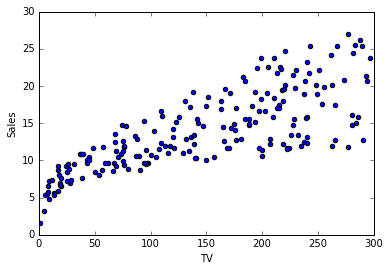

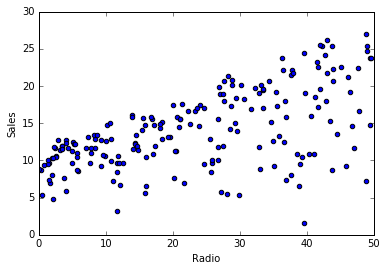

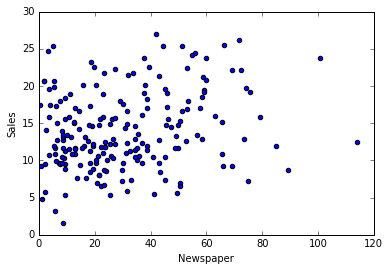

In [2]:
#read data into a DataFrame
data = pd.read_csv('Data/Advertising.csv', index_col=False, header=0)
print(data.head() )
print("Shape of CSV:{}".format(data.shape))

#Television relationship to Sales
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV'); plt.ylabel('Sales'); plt.axis([0, 300, 0,30]);
plt.show()

#Radio relationship to Sales
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio'); plt.ylabel('Sales'); plt.axis([0, 50, 0,30]);
plt.show()

#Newspaper relationship to Sales
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper'); plt.ylabel('Sales'); plt.axis([0, 120, 0,30]);
plt.show()
#Each Graph has 200 observation

### Estimating the Coefficients

- $\beta_0$ and $\beta_1$ are unknown, so using the current data to estimate the coefficients
- We need $\hat \beta_0$ and $\hat \beta_1$ such that they fit the linear model fits the available data as close as possible
- The most common approach for measuring closeness is **_least squares_**
<img src="./Figures/Chapter3/3.
1.png" width="600" height="600">

- $\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$ is the prediction for $Y$ based on the _i_ th value of $X$
- $e_i = y_i - \hat y_i$ represents the _residual_

- The residual represents the difference between the _i_ th observed response

- The _residual sum of squares (RSS)_ is defined as $RSS = e_1^2 + e_2^2 + e_3^2 + ... e_n^2$
- This can be further simplifed to $RSS = \sum_{i=1}^n (e_i^2)$
- The least squares approach chooses $\hat \beta_0$ and $\hat \beta_1$ to minimize the RSS
$$\hat \beta_1 = \frac {\sum_{i=1}^n(x_i - \bar x)(y_i - \bar y)} {\sum_{i=1}^n(x_i - \bar x)^2}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$


### Assessing the Accuracy of the Coefficient Estimates

- The true relationship between $X$ and $Y$ is in the form $Y = \beta_0 + \beta_1X + \epsilon $
- The error term is a catch-all for what we miss
- The error term is considered independent of X
- The model defines _population regression line_ which is the best linear approximation between $X$ and $Y$
- The coefficient estimates characterize the _least square line_

<img src="./Figures/Chapter3/3.3.png" width="600" height="600">

- The concepts of these lines are used to estimate characteristics of a large population
- The population mean $\mu$ of random variable $Y$ is unknown
- From observation, we can make an estimate $\mu$
- A reasonable estimate is $\hat \mu = \bar y$ where $\bar y = \frac{1}{n}\sum_{i=1}^n y_i$
- The sample mean and population mean are different but the sample mean is a good estimate for population mean
- The analogy between linear regression and estimation of the mean of a random variable is an apt one based on the concept of _bias_ 
- Using $\hat\mu \approx \mu$, we say the estimate is _unbiased_ 
- A question you might ask is "How accurate is $\hat\mu$ as an estimate of $\mu$?"
- We need the _standard error_ of $\hat\mu$ written as SE($\hat\mu$)
- The well-known formula $Var(\hat\mu) = SE(\hat\mu)^2 = \frac{\sigma^2}{n}$
- $\sigma$ is the standard deviation of each $y_i$ of $Y$
- To compute the standard error associated with $\hat\beta_0$ and $\hat\beta_0$ we use:

$$SE(\hat\beta_0)^2 = \sigma^2[\frac{1}{n} +\frac{\bar x^2}{\sum_{i=1}^n(x_i - \bar x)^2}]$$

$$ SE(\hat\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar x)^2} $$

- $\sigma^2 = Var(\epsilon)$ where $\sigma$ is the _residual standard error_
- The formula for $RSE = \sqrt{\frac{RSS}{n-2}}$

- The standard errors can be used to compute _confindence intervals_
    -E.g A 95% confindence interval is defined such that a rabge of values such that with 95% probability, the range will contain the true unknown value of the parameter
- $\hat\beta_1 \pm2 * SE(\hat\beta_1)$ is the form for lower and upper bound of the range

#### Hypothesis Testing

- Standard errors can be used to perform hypothesis tests on the coefficients
- The most common hypothesis test involves testing _null hypothesis_ vs _alternative hypothesis_ 
- $H_0$ says there is no relationship between $X$ and $Y$
- $H_A$ says there is some relationship between $X$ and $Y$

- To test the null hypothesis, we compute the t-statistic given by: 
$$ t = \frac{\hat \beta_1 - 0}{SE(\hat \beta_1)}$$
- This measures the number of standard deviations that $\hat\beta_1$ is away from 0
- If there is no relationship, then the t-distribution will have n-2 degrees of freedom
- Computing the probability of $|t|$ or larger, assuming $\beta_1 = 0$ is called the _p-value_
- A small p-value indicates that there is an association between the predictor and the response
- The typical value of p-value cutoffs for reject the null hypothesis are 5 or 1%
<img src="./Figures/Chapter3/3.1a.png" width="600" height="600">



### Assessing the Accuracy of the Model

- Once we reject the null hypothesis, we want to quantify the extent which the model fits the data
- The quality of the linear regression fit is typically assessed using 2 quantities
    - Residual Standard Error
    - $R^2$
<img src="./Figures/Chapter3/3.2a2.png" width="600" height="600">

#### Residual Standard Error

- Recall that the model that associated with each observation is $\epsilon$
- Because of this, we will never be able to perfectly predict Y from X
- The RSE is an estimate of the standard deviation of $\epsilon$
- It is average amount that the response will deviate from the true regression line
$$ RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \hat y_i)^2}$$

- The output of RSE in the table is 3.26, meaning sales in each market will deviate from the regression line by ~3260 units on average
- The mean value of sales over all markets is 14000 units so the percentage error is $\frac{3260}{14000}= 23%$
- Because of this percentage, the RSE is considered _lack of fit_
- If the predictions were close to the true outcome values
$\hat y_i \approx y_i$ then the RSE will be small

#### $R^2$ Statistic

- The RSE shows lack of fit of the model, but since it is measured in the units of Y, its not always clear what constitutes a good RSE
$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$
$TSS = \sum (y_i - \bar y)^2$
- TSS represents the _total sum of squares_
- TSS measures the total variance in the response Y
- "The amount of variability inherent in the response before the regression is performed"
- RSS measures the amount of variability that is left unexplained after the regression
- TSS - RSS measures the amount of variability in the response
- $R^2$ measures the proportion of variability in Y that can explained using X
- $R^2$ statistic that is close to 1 indicates that a large proportion of variability has been explained by regression
- $R^2$ statistic near 0 indicates that the regression did not explain much of the variability in the response
    - This might because inherent error$\sigma^2$ is high
    - Or the linear model is wrong


(200,)


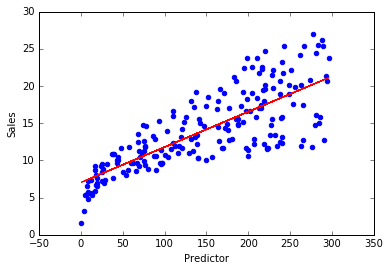

Slope: [[ 0.04753664]]
Intercept: [ 7.03259355]


In [26]:
x = data['TV'].values
x = x.reshape(200,1)
plt.xlabel('Predictor')  
#print(x.shape)

y = data['Sales'].values
y = y.reshape(200,1)
plt.ylabel('Sales');

lr1 = LinearRegression()
lr1.fit(x, y)

plt.scatter(x, y, color='blue')
plt.plot(x, lr1.predict(x), color='red')

plt.show()
print("Slope: {}".format(lr1.coef_))
print("Intercept: {}".format(lr1.intercept_))